# MongoDB: installation, database import and queries

In the following two lectures we will perform several queries with MongoDB on a reduced version of the Instacart database. We will see how to:

1. Import the reduced version of the MongoDB database
2. Install the PyMongo Python library to communicate with the MongoDB server
3. Perform synchronous queries with PyMongo on the Instacart database
4. Perform asynchronous queries with Motor on the Instacart database


## 1. Import database

Now, let's import the MongoDB reduced version of the <i>Instacart</i> database. We can import the database with the following command:

``mongoimport --db instacart --collection orders --file db/orders.js``

We have called the dabatase as <i>instacart</i>, and the collection as <i>orders</i>.

We can check the correct import of the database by:
1. opening MongoDB on the terminal app
2. typing ``mongo``
3. typing ``show dbs``
4. typing ``use instacart``
5. typing ``show collections``

Here's the full guide to the Mongo Shell: https://www.mongodb.com/docs/mongodb-shell/

##### Note for Windows users
By default, you have to use the full path to the mongo.exe. </br>
Alternatively, you can add it to the PATH variable.

In my case:
- the full path of mongo is ``"C:/Program Files/MongoDB/Server/8.0/bin/"``
- the full path of mongoimport is ``"C:\Program Files\MongoDB\Tools\100\bin\"``

Notice values in Windows PATH variable have to end with "\\" or "/".

## 2. Pymongo

As for PostgreSQL, we need to use a library that provides an interface with MongoDB. This is PyMongo: it is a Python library containing tools to work with MongoDB, and is the recommended way to work with MongoDB from Python.

We can install PyMongo with pip (``pip install pymongo``) or anaconda. The doc of the library can be found here: https://www.mongodb.com/docs/languages/python/pymongo-driver/current/


In [4]:
!pip install pymongo==4.9.2

In [7]:
import pymongo

In [8]:
client = pymongo.MongoClient() # host has to be specified if not "localhost"
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [9]:
# Show dbs
client.list_database_names()

['ASKE',
 'EmoTradeAdvisor',
 'IMDB',
 'OCR-Parlamento',
 'OCR-Wikisource',
 'admin',
 'config',
 'illinois_caselaw',
 'instacart',
 'lawscraper',
 'local']

In [10]:
# Use instacart
db = client['instacart']
type(db)

pymongo.synchronous.database.Database

In [11]:
# Show collections
db.list_collection_names()

['orders']

In [12]:
# Use orders
cll = db['orders']
type(cll)

pymongo.synchronous.collection.Collection

Using ```find_one()``` we get one document that satisfies the specified query criteria on the collection. Notice here that the query argument is empty.

If multiple documents satisfy the query, this method returns the first document according to the order of documents on the disk.

In [13]:
# How is an object of the database made?
example = cll.find_one()
example

{'_id': ObjectId('60af57782fbbe971834ae2a6'),
 'order_id': 2539329,
 'user_id': 1,
 'order_number': 1,
 'order_dow': 2,
 'order_hour_of_day': 8,
 'products': [{'product_id': 196,
   'product_name': 'Soda',
   'aisle_id': 77,
   'aisle': 'soft drinks',
   'department_id': 7,
   'department': 'beverages',
   'add_to_cart_order': 1},
  {'product_id': 12427,
   'product_name': 'Original Beef Jerky',
   'aisle_id': 23,
   'aisle': 'popcorn jerky',
   'department_id': 19,
   'department': 'snacks',
   'add_to_cart_order': 3},
  {'product_id': 14084,
   'product_name': 'Organic Unsweetened Vanilla Almond Milk',
   'aisle_id': 91,
   'aisle': 'soy lactosefree',
   'department_id': 16,
   'department': 'dairy eggs',
   'add_to_cart_order': 2},
  {'product_id': 26088,
   'product_name': 'Aged White Cheddar Popcorn',
   'aisle_id': 23,
   'aisle': 'popcorn jerky',
   'department_id': 19,
   'department': 'snacks',
   'add_to_cart_order': 4},
  {'product_id': 26405,
   'product_name': 'XL Pick-A-S

Every document in the collection has an <i>_id</i> field that is used to uniquely identify the document in a particular collection. It acts as the primary key for the documents in the collection.

Using ```find()``` we get all documents that satisfies the specified query criteria on the collection. The result is a cursor. We have to iterate over the cursor in order to access data.

In [14]:
cursor = cll.find()

In [22]:
record = next(cursor)
record

{'_id': ObjectId('60af57782fbbe971834ae2a9'),
 'order_id': 2254736,
 'user_id': 1,
 'order_number': 4,
 'order_dow': 4,
 'order_hour_of_day': 7,
 'days_since_prior_order': 29.0,
 'products': [{'product_id': 196,
   'product_name': 'Soda',
   'aisle_id': 77,
   'aisle': 'soft drinks',
   'department_id': 7,
   'department': 'beverages',
   'add_to_cart_order': 1,
   'reordered': 1},
  {'product_id': 10258,
   'product_name': 'Pistachios',
   'aisle_id': 117,
   'aisle': 'nuts seeds dried fruit',
   'department_id': 19,
   'department': 'snacks',
   'add_to_cart_order': 3,
   'reordered': 1},
  {'product_id': 12427,
   'product_name': 'Original Beef Jerky',
   'aisle_id': 23,
   'aisle': 'popcorn jerky',
   'department_id': 19,
   'department': 'snacks',
   'add_to_cart_order': 2,
   'reordered': 1},
  {'product_id': 25133,
   'product_name': 'Organic String Cheese',
   'aisle_id': 21,
   'aisle': 'packaged cheese',
   'department_id': 16,
   'department': 'dairy eggs',
   'add_to_cart_o

## Simple queries

#### Display all the orders of the user with id equal to 1

In [23]:
query = {"user_id" : 1}

cursor = cll.find(query)

In [24]:
print("User ID\t Order ID")
for obj in cursor:
    print(obj['user_id'],"\t", obj['order_id'])

User ID	 Order ID
1 	 2539329
1 	 473747
1 	 431534
1 	 2398795
1 	 2550362
1 	 3367565
1 	 2254736
1 	 550135
1 	 1187899
1 	 3108588
1 	 2295261


In [25]:
# Notice cursor objects get "exhausted", just like in the case we saw with PsycoPG
print("User ID\t Order ID")
for obj in cursor:
    print(obj['user_id'],"\t", obj['order_id'])

User ID	 Order ID


# 3. Perform queries using PyMongo
There are two fundamental operations in a MongoDB query:
1. filter (~ ``WHERE`` in SQL)
2. projection (~ ``SELECT`` in SQL)

In [26]:
query = {"user_id" : 1}
projection = {'_id' : 0, 'user_id' : 0, 'products' : 0} # Exclusive projection

cursor = cll.find(filter = query, projection = projection)

for record in cursor:
    print(record)

{'order_id': 2539329, 'order_number': 1, 'order_dow': 2, 'order_hour_of_day': 8}
{'order_id': 473747, 'order_number': 3, 'order_dow': 3, 'order_hour_of_day': 12, 'days_since_prior_order': 21.0}
{'order_id': 431534, 'order_number': 5, 'order_dow': 4, 'order_hour_of_day': 15, 'days_since_prior_order': 28.0}
{'order_id': 2398795, 'order_number': 2, 'order_dow': 3, 'order_hour_of_day': 7, 'days_since_prior_order': 15.0}
{'order_id': 2550362, 'order_number': 10, 'order_dow': 4, 'order_hour_of_day': 8, 'days_since_prior_order': 30.0}
{'order_id': 3367565, 'order_number': 6, 'order_dow': 2, 'order_hour_of_day': 7, 'days_since_prior_order': 19.0}
{'order_id': 2254736, 'order_number': 4, 'order_dow': 4, 'order_hour_of_day': 7, 'days_since_prior_order': 29.0}
{'order_id': 550135, 'order_number': 7, 'order_dow': 1, 'order_hour_of_day': 9, 'days_since_prior_order': 20.0}
{'order_id': 1187899, 'order_number': 11, 'order_dow': 4, 'order_hour_of_day': 8, 'days_since_prior_order': 14.0}
{'order_id': 3

In [27]:
query = {"user_id" : 1}
projection = {'order_id' : 1} # Inclusive projection

cursor = cll.find(query, projection)

for record in cursor :
    print(record)

{'_id': ObjectId('60af57782fbbe971834ae2a6'), 'order_id': 2539329}
{'_id': ObjectId('60af57782fbbe971834ae2a8'), 'order_id': 473747}
{'_id': ObjectId('60af57782fbbe971834ae2aa'), 'order_id': 431534}
{'_id': ObjectId('60af57782fbbe971834ae2a7'), 'order_id': 2398795}
{'_id': ObjectId('60af57782fbbe971834ae2af'), 'order_id': 2550362}
{'_id': ObjectId('60af57782fbbe971834ae2ab'), 'order_id': 3367565}
{'_id': ObjectId('60af57782fbbe971834ae2a9'), 'order_id': 2254736}
{'_id': ObjectId('60af57782fbbe971834ae2ac'), 'order_id': 550135}
{'_id': ObjectId('60af57782fbbe971834ae2b0'), 'order_id': 1187899}
{'_id': ObjectId('60af57782fbbe971834ae2ad'), 'order_id': 3108588}
{'_id': ObjectId('60af57782fbbe971834ae2ae'), 'order_id': 2295261}


To impose conditions on nested features:

In [28]:
query = {'user_id': 1, "products.add_to_cart_order": 7}
projection = {'products.add_to_cart_order':1}
cursor = cll.find(query, projection)

for record in cursor:
    print(record)

{'_id': ObjectId('60af57782fbbe971834ae2aa'), 'products': [{'add_to_cart_order': 1}, {'add_to_cart_order': 3}, {'add_to_cart_order': 5}, {'add_to_cart_order': 2}, {'add_to_cart_order': 8}, {'add_to_cart_order': 6}, {'add_to_cart_order': 4}, {'add_to_cart_order': 7}]}
{'_id': ObjectId('60af57782fbbe971834ae2af'), 'products': [{'add_to_cart_order': 1}, {'add_to_cart_order': 6}, {'add_to_cart_order': 9}, {'add_to_cart_order': 8}, {'add_to_cart_order': 5}, {'add_to_cart_order': 7}, {'add_to_cart_order': 4}, {'add_to_cart_order': 3}, {'add_to_cart_order': 2}]}
{'_id': ObjectId('60af57782fbbe971834ae2b0'), 'products': [{'add_to_cart_order': 1}, {'add_to_cart_order': 6}, {'add_to_cart_order': 7}, {'add_to_cart_order': 2}, {'add_to_cart_order': 8}, {'add_to_cart_order': 4}, {'add_to_cart_order': 9}, {'add_to_cart_order': 3}, {'add_to_cart_order': 5}, {'add_to_cart_order': 11}, {'add_to_cart_order': 10}]}


### Exception handling

In [29]:
# Note: By default MongoDB databases are not secured by authentication
import pandas as pd

def query(database, collection, query=None, projection=None, host='localhost', port=27017, limit=0):
    try:
        client = pymongo.MongoClient(host=host, port=port)
        db = client[database]
        cll = db[collection]
    except (ConnectionError) as e:
        print(e)
    
    else:
        try:
            cursor = cll.find(query, projection).limit(limit)
            return pd.DataFrame.from_records(list(cursor))
        except (Exception) as e:
            print(e)
        finally:
            client.close()            

query('instacart', 'orders', query={"user_id" : 1}, projection={"products":0, "_id":0})

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,473747,1,3,3,12,21.0
2,431534,1,5,4,15,28.0
3,2398795,1,2,3,7,15.0
4,2550362,1,10,4,8,30.0
5,3367565,1,6,2,7,19.0
6,2254736,1,4,4,7,29.0
7,550135,1,7,1,9,20.0
8,1187899,1,11,4,8,14.0
9,3108588,1,8,1,14,14.0


### Exercise 1.1 
##### How many orders were set on Tuesday at 12:00?

The ``count_documents`` method is available to perform counts (documentation [here](https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html#pymongo.collection.Collection.count_documents)). It receives a filter and it counts the number of documents that are compliant to the filter.

In [30]:
query = {"order_dow" : 2, "order_hour_of_day" : 12}
cll.count_documents(query)

10384

Method ```count_documents()``` is equivalent to ```find()``` plus transforming the cursor object into a list and computing its length.

In [31]:
len(list(cll.find(query)))

10384

In [32]:
len(cll.find(query))

TypeError: object of type 'Cursor' has no len()

In [33]:
from timeit import timeit

In [34]:
timeit("""cll.count_documents(query)""", number = 10, globals = {'cll':cll, 'query':query})

6.425022099996568

In [35]:
timeit("""len(list(cll.find(query)))""", number = 10, globals = {'cll':cll, 'query':query})

8.941166300006444

### Aggregation

In order to perform more complex queries the filter-projection mechanism is not enough, so we have to use aggregation. As you may have seen in general MongoDB theory, aggregation is a way to specify a pipeline of operations to be performed on a collection. The `match` operator here substitutes the filter operation, and the `project` operator works in the same way as the projection in previous queries. Furthermore, we can have `group`, `unwind`, `sort` and many other operators.

In [36]:
cursor = cll.aggregate([
    {'$match': query}, 
    {'$group': {'_id': None, 
                'count': {'$sum': 1}}}
])

cursor.next() #next(cursor)

{'_id': None, 'count': 10384}

In [37]:
# More or less as fast as the count_documents function
timeit("""cll.aggregate([{'$match': query}, {'$group': {'_id': None, 'count': {'$sum':1}}}])""", number = 10, globals = {'cll':cll, 'query':query})

6.4632629999978235

In [38]:
# And it can also provide an explanation of performed steps
pipeline = [
    {'$match': query}, 
    {'$group': {'_id': None, 
                'count': {'$sum': 1}}}
]
db.command('aggregate', 'orders', pipeline=pipeline, explain=True) # Notice it's a method of the database, while aggregate is a collection's method

{'explainVersion': '1',
 'stages': [{'$cursor': {'queryPlanner': {'namespace': 'instacart.orders',
     'indexFilterSet': False,
     'parsedQuery': {'$and': [{'order_dow': {'$eq': 2}},
       {'order_hour_of_day': {'$eq': 12}}]},
     'queryHash': '25C8C8DA',
     'planCacheKey': '9599425A',
     'maxIndexedOrSolutionsReached': False,
     'maxIndexedAndSolutionsReached': False,
     'maxScansToExplodeReached': False,
     'winningPlan': {'stage': 'COLLSCAN',
      'filter': {'$and': [{'order_dow': {'$eq': 2}},
        {'order_hour_of_day': {'$eq': 12}}]},
      'direction': 'forward'},
     'rejectedPlans': []}}},
  {'$group': {'_id': {'$const': None}, 'count': {'$sum': {'$const': 1}}}}],
 'serverInfo': {'host': 'DESKTOP-4I709AR',
  'port': 27017,
  'version': '5.0.8',
  'gitVersion': 'c87e1c23421bf79614baf500fda6622bd90f674e'},
 'serverParameters': {'internalQueryFacetBufferSizeBytes': 104857600,
  'internalQueryFacetMaxOutputDocSizeBytes': 104857600,
  'internalLookupStageIntermedi

### Exercise 1.2
##### Count the total number of orders for each day of the week

In SQL:

In [39]:
sql = """
SELECT order_dow, COUNT(order_id) AS total_orders 
FROM orders 
GROUP BY order_dow
"""

MongoDB aggregation framework is modeled on the concept of data processing pipelines: documents enter a multi-stage pipeline that transforms the documents into a final aggregated result.

In [40]:
# SELECT order_dow, COUNT(order_id) AS total_orders
# GROUP BY order_dow 
group = {"$group": {"_id": "$order_dow", "total_orders": {"$sum": 1}}}

# ORDER BY total_orders DESC
sort = {"$sort": {"total_orders": -1}}

In [41]:
list(cll.aggregate([group, sort]))

[{'_id': None, 'total_orders': 175495},
 {'_id': 1, 'total_orders': 171572},
 {'_id': 2, 'total_orders': 136441},
 {'_id': 5, 'total_orders': 132801},
 {'_id': 6, 'total_orders': 131785},
 {'_id': 3, 'total_orders': 127555},
 {'_id': 4, 'total_orders': 124351}]

In [42]:
# Translate in Pandas
pd.DataFrame.from_records(list(cll.aggregate([group, sort])))

,_id,total_orders
0,NaN,175495
1,1.0,171572
2,2.0,136441
3,5.0,132801
4,6.0,131785
5,3.0,127555
6,4.0,124351


### Exercise 1.3 
##### Count the total number of orders for each day of the weekend (saturday, sunday)
Let's do it in SQL

In [43]:
sql = """
SELECT order_dow, COUNT(order_id) AS total_orders 
FROM orders 
WHERE order_dow IN (6, 0)
GROUP BY order_dow
ORDER BY total_orders DESC
"""
# Here Sunday = 0, Saturday = 6

In [44]:
# SELECT order_dow, COUNT(order_id) AS total_orders 
# GROUP BY order_dow 
group = {"$group": {"_id": "$order_dow", "total_orders": {"$sum": 1}}}

# WHERE order_dow IN (6, 0)
match = {"$match": {"$or": [{"order_dow": None}, {"order_dow": {"$gt": 5}}]}}  # Here Sunday = None, Saturday = 6

# ORDER BY total_orders DESC
sort = {"$sort": {"total_orders": -1}}

In [45]:
pd.DataFrame.from_records(list(cll.aggregate([match, group, sort]))).fillna(0)

,_id,total_orders
0,0.0,175495
1,6.0,131785


### Exercise 1.4
##### Select the lists of products ordered by each user at each hour of day

In [46]:
group = {"$group": {"_id": {"user_id": "$user_id", "order_dow": "$order_dow"}, 
                    "orders": {"$push": "$products.product_name"}}}

# $push is used to append to a list

cursor = cll.aggregate([group]) # this query gives a memory error

next(cursor)

OperationFailure: PlanExecutor error during aggregation :: caused by :: Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in., full error: {'ok': 0.0, 'errmsg': "PlanExecutor error during aggregation :: caused by :: Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in.", 'code': 292, 'codeName': 'QueryExceededMemoryLimitNoDiskUseAllowed'}

In [47]:
group = {"$group": {"_id": {"user_id": "$user_id", "order_dow": "$order_dow"}, 
                    "orders": {"$push": "$products.product_name"}}}

# $push is used to append to a list

cursor = cll.aggregate([group], allowDiskUse = True)

# allowDiskUse solves the problem by storing large output on disk

next(cursor)

{'_id': {'user_id': 1, 'order_dow': 1},
 'orders': [['Soda',
   'Pistachios',
   'Original Beef Jerky',
   'Cinnamon Toast Crunch',
   'Organic String Cheese'],
  ['Soda',
   'Pistachios',
   'Original Beef Jerky',
   'Organic String Cheese',
   'Zero Calorie Cola',
   'Organic Half & Half'],
  ['Soda',
   'Pistachios',
   'Original Beef Jerky',
   'Organic String Cheese',
   'Zero Calorie Cola',
   'Organic Half & Half']]}

In [48]:
records = [
    {'user_id':record['_id']['user_id'], 
     'order_dow':record['_id']['order_dow'] if 'order_dow' in record['_id'] else 0, 
     'n_orders':len(record['orders'])} 
for record in cursor]

In [49]:
records

[{'user_id': 1, 'order_dow': 2, 'n_orders': 2},
 {'user_id': 1, 'order_dow': 3, 'n_orders': 2},
 {'user_id': 1, 'order_dow': 4, 'n_orders': 4},
 {'user_id': 2, 'order_dow': 1, 'n_orders': 6},
 {'user_id': 2, 'order_dow': 2, 'n_orders': 5},
 {'user_id': 2, 'order_dow': 3, 'n_orders': 2},
 {'user_id': 2, 'order_dow': 4, 'n_orders': 1},
 {'user_id': 2, 'order_dow': 5, 'n_orders': 1},
 {'user_id': 3, 'order_dow': 0, 'n_orders': 6},
 {'user_id': 3, 'order_dow': 1, 'n_orders': 2},
 {'user_id': 3, 'order_dow': 2, 'n_orders': 1},
 {'user_id': 3, 'order_dow': 3, 'n_orders': 3},
 {'user_id': 3, 'order_dow': 5, 'n_orders': 0},
 {'user_id': 4, 'order_dow': 3, 'n_orders': 0},
 {'user_id': 4, 'order_dow': 4, 'n_orders': 2},
 {'user_id': 4, 'order_dow': 5, 'n_orders': 2},
 {'user_id': 4, 'order_dow': 6, 'n_orders': 1},
 {'user_id': 5, 'order_dow': 0, 'n_orders': 2},
 {'user_id': 5, 'order_dow': 1, 'n_orders': 1},
 {'user_id': 5, 'order_dow': 3, 'n_orders': 2},
 {'user_id': 6, 'order_dow': 2, 'n_order

### Spin-off of Exercise 1.4
##### Plot a boxplot of the number of orders placed by each user at each day of the week

In [50]:
import seaborn as sns

In [51]:
group = {"$group": {"_id":{"user_id":"$user_id", "dow":"$order_dow"}, "count": {"$sum": 1}}}
project = {"$project":{"user_id":"$_id.user_id", "dow":"$_id.dow", "count":1, "_id":0}}

res = list(cll.aggregate([group, project]))
res[0]

{'count': 9, 'user_id': 56639}

<AxesSubplot:xlabel='dow', ylabel='count'>

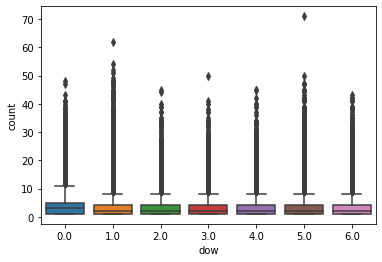

In [49]:
df = pd.DataFrame(res).fillna(0)
sns.boxplot(data = df, x = "dow", y = "count")

<AxesSubplot:xlabel='dow', ylabel='count'>

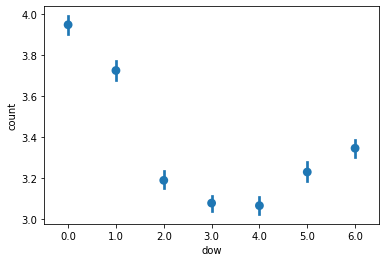

In [50]:
# Another representation: pointplot with confidence intervals
sns.pointplot(data = df, x = "dow", y = "count", join = False, ci = 99)

<AxesSubplot:xlabel='dow', ylabel='count'>

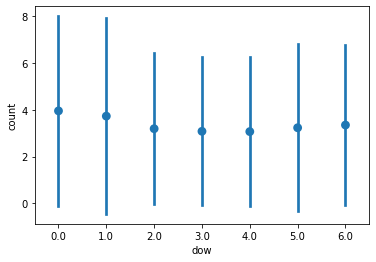

In [51]:
# pointplot with standard deviations
sns.pointplot(data = df, x = "dow", y = "count", join = False, ci = "sd")

# 4. Asynchronous queries with Motor

In [52]:
!pip install motor

In [54]:
import asyncio
import nest_asyncio # For nested asynchorous operations, necessary in Jupyter but often unnecessary in Python scripts
from motor.motor_asyncio import AsyncIOMotorClient
from time import sleep

nest_asyncio.apply()

async def ping_server():
    # Replace the placeholder with your Atlas connection string
    uri = "mongodb://localhost:27017/"
    
    # Set the Stable API version when creating a new client
    client = AsyncIOMotorClient(uri)
    
    # Send a ping to confirm a successful connection
    try:
        await client.admin.command('ping')
        print("Pinged your deployment. You successfully connected to MongoDB!")
    except Exception as e:
        print(e)

    return client

ping_server()

<coroutine object ping_server at 0x000001C42EC32A40>

In [55]:
client = asyncio.run(ping_server())

Pinged your deployment. You successfully connected to MongoDB!


In [57]:
type(client)

motor.motor_asyncio.AsyncIOMotorClient

In [58]:
future = client.list_database_names()
type(future), future.done()

(asyncio.futures.Future, False)

In [59]:
future.done() # Important note: in Jupyter you have to change cell to have back the result from a future object

True

In [60]:
future.result()

['ASKE',
 'EmoTradeAdvisor',
 'IMDB',
 'OCR-Parlamento',
 'OCR-Wikisource',
 'admin',
 'config',
 'illinois_caselaw',
 'instacart',
 'lawscraper',
 'local']

In [61]:
asyncio.run(client.list_database_names())

['ASKE',
 'EmoTradeAdvisor',
 'IMDB',
 'OCR-Parlamento',
 'OCR-Wikisource',
 'admin',
 'config',
 'illinois_caselaw',
 'instacart',
 'lawscraper',
 'local']

In [62]:
db = client['instacart']
cll = db['orders']
cll

AsyncIOMotorCollection(Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=False, driver=DriverInfo(name='Motor', version='3.6.0', platform='asyncio')), 'instacart'), 'orders'))

In [63]:
group = {"$group": {"_id":{"user_id":"$user_id", "dow":"$order_dow"}, "count": {"$sum": 1}}}
project = {"$project":{"user_id":"$_id.user_id", "dow":"$_id.dow", "count":1, "_id":0}}

asyncio.run(cll.aggregate([group, project]).to_list())

TypeError: An asyncio.Future, a coroutine or an awaitable is required

![alt text](https://66.media.tumblr.com/f904bf42571febbbc71c07941c98165c/tumblr_ndtq8oEL1v1rey868o1_500.gif)